In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib.dates import DayLocator,MonthLocator, DateFormatter, YearLocator

In [4]:
df = pd.read_csv('ACNHTweet0410.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598594 entries, 0 to 598593
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      598594 non-null  int64 
 1   date            598594 non-null  object
 2   tweet           598594 non-null  object
 3   language        598594 non-null  object
 4   hashtags        598594 non-null  object
 5   likes_count     598594 non-null  int64 
 6   replies_count   598594 non-null  int64 
 7   retweets_count  598594 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 36.5+ MB


In [5]:
print(df.date.max())
print(df.date.min())

2021-04-09
2020-02-29


In [220]:
test = df[df['tweet'].str.contains('firework') | df['tweet'].str.contains('pride') ]
export = test[(test['tweet'].str.contains('Judy') | test['tweet'].str.contains('Sherb') | test['tweet'].str.contains('Dom'))]
export.to_csv('export.csv')

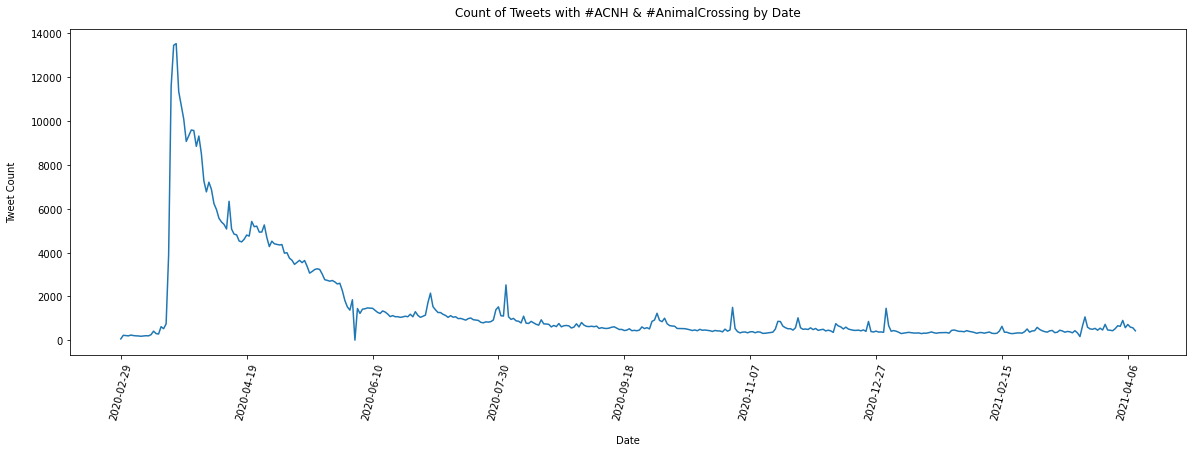

In [6]:
df5 = df.groupby('date')['tweet'].count()
plt.rcParams["figure.figsize"] = (20, 6)
df5.plot()
plt.xlabel("Date", labelpad=14)
plt.xticks(rotation = 75)
plt.ylabel("Tweet Count", labelpad=14)
plt.title("Count of Tweets with #ACNH & #AnimalCrossing by Date", y=1.02)
pass

### Villagers in Twitter Data

In [7]:
villager = pd.read_csv('Villagers.csv')
villager = villager.loc[:,['Name','Species','Gender','Personality','Hobby','Birthday']]
villager.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         397 non-null    object
 1   Species      397 non-null    object
 2   Gender       397 non-null    object
 3   Personality  397 non-null    object
 4   Hobby        397 non-null    object
 5   Birthday     397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


In [189]:
villagernm = [i for i in villager.Name]
def villagernmct1(data):  
    x = []
    y = []  
    for i in villagernm:
        count = 0
        count = len(data[(data['tweet'].str.contains(i +' '))
                        & (~data['tweet'].str.contains('Tom Nook') 
                        & ~data['tweet'].str.contains('cherry blossom')
                        & ~data['tweet'].str.contains('Cherry Blossom')
                        & ~data['tweet'].str.contains('Daisy Mae'))])
        x.append(i)
        y.append(count)
    return pd.DataFrame({'Villager':x, 'TweetCt': y})


In [190]:
a1 = villagernmct1(df)
a1.sort_values(by = 'TweetCt', ascending = False)

,Villager,TweetCt
298,Raymond,1960
228,Marshal,1308
329,Sherb,742
186,Judy,611
116,Dom,595
...,...,...
350,T-Bone,6
395,Rilla,6
160,Greta,5
54,Boyd,4


The top 5 popular villagers are Raymond(Smug), Marshal(Smug), Sherb(Lazy), Judy and Dom

In [221]:
dfRay = df[df['tweet'].str.contains('Raymond') ]
df1v = pd.DataFrame(dfRay.groupby('date')['tweet'].count().reset_index())

dfMar = df[df['tweet'].str.contains('Marshal') ]
df2v = pd.DataFrame(dfMar.groupby('date')['tweet'].count().reset_index())

dfshe = df[df['tweet'].str.contains('Sherb')]
df3v = pd.DataFrame(dfshe.groupby('date')['tweet'].count().reset_index())

dfdai = df[df['tweet'].str.contains('Judy') ]
df4v = pd.DataFrame(dfdai.groupby('date')['tweet'].count().reset_index())

dfjud = df[df['tweet'].str.contains('Dom') ]
df5v = pd.DataFrame(dfjud.groupby('date')['tweet'].count().reset_index())

In [222]:
###Convert dates to datetime format
df1v['date'] = pd.to_datetime(df1v['date'])
df2v['date'] = pd.to_datetime(df2v['date'])
df3v['date'] = pd.to_datetime(df3v['date'])
df4v['date'] = pd.to_datetime(df4v['date'])
df5v['date'] = pd.to_datetime(df5v['date'])
df2v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    370 non-null    datetime64[ns]
 1   tweet   370 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.9 KB


#### Trend Chart of Tweet Counts by villagers

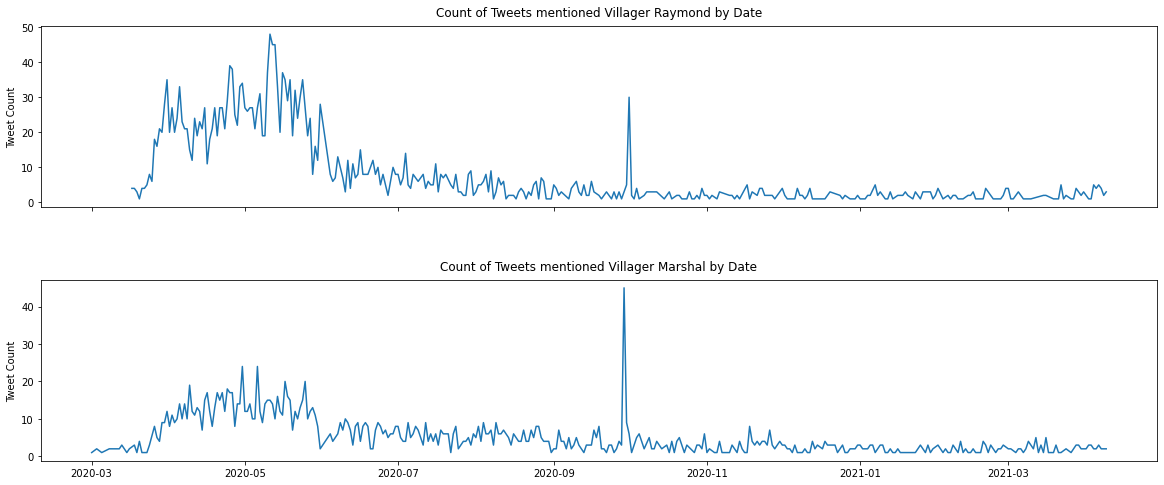

In [223]:
fig, ax = plt.subplots(2,1, figsize = (20, 8), sharex = True)
fig.subplots_adjust(hspace=.4)


ax[0].plot(df1v.date,df1v.tweet)
ax[0].set_title("Count of Tweets mentioned Villager Raymond by Date", y=1.02)
ax[0].set_ylabel('Tweet Count')


ax[1].plot(df2v.date,df2v.tweet)
ax[1].set_title("Count of Tweets mentioned Villager Marshal by Date", y=1.02)
ax[1].set_ylabel('Tweet Count')

plt.savefig('TweetTrendbyTop2Villagers.png', facecolor='w', edgecolor='w')


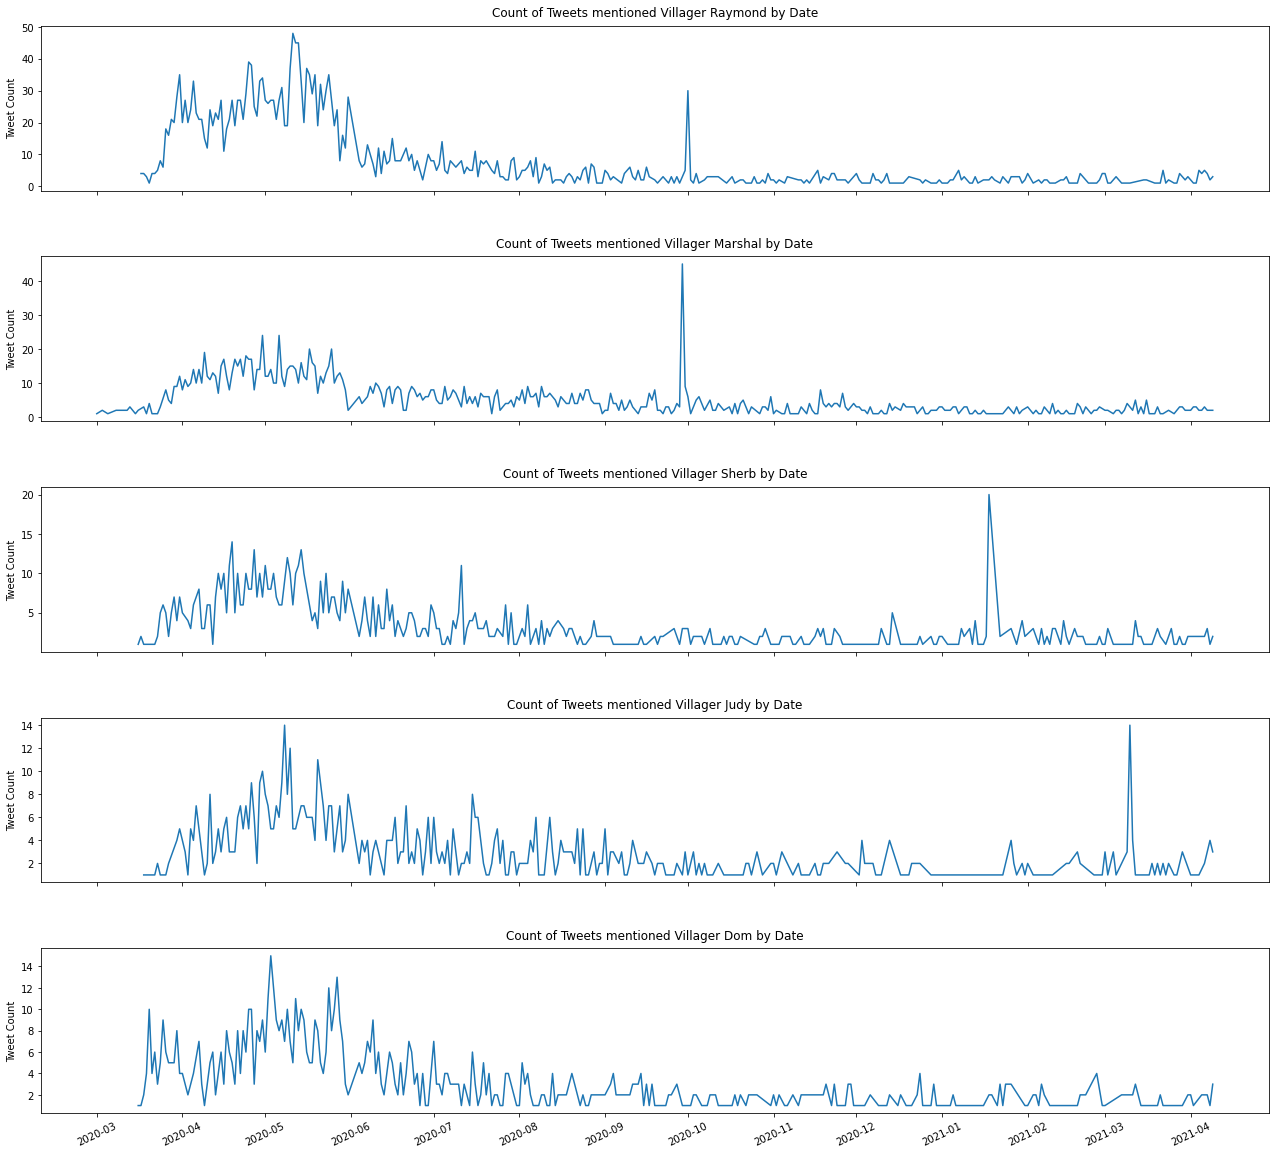

In [224]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(5,1, figsize = (22, 20), sharex = True)
fig.subplots_adjust(hspace=.4)


ax[0].plot(df1v.date,df1v.tweet)
ax[0].set_title("Count of Tweets mentioned Villager Raymond by Date", y=1.02)
ax[0].set_ylabel('Tweet Count')


ax[1].plot(df2v.date,df2v.tweet)
ax[1].set_title("Count of Tweets mentioned Villager Marshal by Date", y=1.02)
ax[1].set_ylabel('Tweet Count')


ax[2].plot(df3v.date,df3v.tweet)
ax[2].set_title("Count of Tweets mentioned Villager Sherb by Date", y=1.02)
ax[2].set_ylabel('Tweet Count')


ax[3].plot(df4v.date,df4v.tweet)
ax[3].set_title("Count of Tweets mentioned Villager Judy by Date", y=1.02)
ax[3].set_ylabel('Tweet Count')


ax[4].plot(df5v.date,df5v.tweet)
ax[4].set_title("Count of Tweets mentioned Villager Dom by Date", y=1.02)
ax[4].set_ylabel('Tweet Count')

ax = plt.gca()

ax.xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation = 25)


plt.savefig('TweetTrendbyTop5Villagers.png', facecolor='w', edgecolor='w')
pass

### Villager Personality in Twitter Data

In [16]:
print(len(df))
len(df[(df['tweet'].str.contains('villager') | df['tweet'].str.contains('Villager'))])

598594


20674

3% of the total tweets mentioned villagers.

In [14]:
##Pull Tweets with Villager Personality Mentioned

personality = ['Big Siser','Sisterly','Cranky','Jock','Lazy','Normal','Peppy','Smug','Snooty']

def personalityct(data):  
    x = []
    y = []  
    for i in personality:
        count = 0
        count = len(data[(data['tweet'].str.contains('villager') | data['tweet'].str.contains('Villager')) 
                         & (data['tweet'].str.contains(i) | data['tweet'].str.contains(i.lower()))])
        x.append(i)
        y.append(count)
    return pd.DataFrame({'Personality':x, 'TweetCt': y})

In [15]:
personalityct(df)

,Personality,TweetCt
0,Big Siser,0
1,Sisterly,23
2,Cranky,130
3,Jock,156
4,Lazy,193
5,Normal,131
6,Peppy,116
7,Smug,112
8,Snooty,95


Words like lazy and normal in tweets might not really refer to the villager personality, but I don't know how to parse that out.

In [21]:
df[(df['tweet'].str.contains('villager') & (df['tweet'].str.contains('smug') | df['tweet'].str.contains('Smug')))]

,Unnamed: 0,date,tweet,language,hashtags,likes_count,replies_count,retweets_count
11871,43099,2021-03-20,My favorite villagers from each personality an...,en,['acnh'],5,2,0
18654,68712,2021-03-04,anyone want to guess who my first campsite vil...,en,"['animalcrossing', 'どうぶつの森', 'acnh', 'campsite']",8,7,0
19896,73859,2021-03-01,My 3 fave villagers!!! Can you tell that smug ...,en,"['raymondacnh', 'deeracnh', 'animalcrossing', ...",9,0,1
22905,85922,2021-02-22,What it's like having two smug villagers on yo...,en,['acnh'],15,2,0
29727,116203,2021-02-03,"Elliott, Harvey, and Alex + their AC villager ...",en,"['stardewvalley', 'acnh']",66,2,25
...,...,...,...,...,...,...,...,...
497817,755178,2020-03-28,sooo looks like the first visitor to the camps...,en,['acnh'],171,160,17
502345,770919,2020-03-27,Animal Crossing has taken over everything I lo...,en,"['dragonball', 'animalcrossing']",81,0,29
502819,771913,2020-03-27,My villager looks so smug ahdhfjwa isnt she pr...,en,"['animalcrossing', 'acnh', 'nintendoswitch']",5,1,0
516616,802068,2020-03-26,Marshall is one of my fave villagers &lt;3 I l...,en,"['tbt', 'animalcrossing']",500,3,121


### Villager Species in Twitter

In [46]:
villagersp = [i for i in villager.Species.unique()]
def villagerspct(data):  
    x = []
    y = []  
    for i in villagersp:
        count = 0
        count = len(data[(data['tweet'].str.contains(i) | data['tweet'].str.contains(i.lower()))])
        x.append(i)
        y.append(count)
    return pd.DataFrame({'Species':x, 'TweetCt': y})


In [47]:
b = villagerspct(df)
b.sort_values(by = 'TweetCt', ascending = False)

,Species,TweetCt
10,Cat,2831
23,Bear,1163
22,Dog,884
30,Frog,687
14,Wolf,617
25,Duck,522
21,Cub,430
0,Bird,401
20,Tiger,310
1,Squirrel,296


### Word Cloud
What are some popular words when they tweeted about villagers?

In [211]:
dfvillager = df[(df['tweet'].str.contains('Judy') | df['tweet'].str.contains('Sherb') | df['tweet'].str.contains('Dom'))]
dfvillager.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2783 entries, 113 to 594909
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2783 non-null   int64 
 1   date            2783 non-null   object
 2   tweet           2783 non-null   object
 3   language        2783 non-null   object
 4   hashtags        2783 non-null   object
 5   likes_count     2783 non-null   int64 
 6   replies_count   2783 non-null   int64 
 7   retweets_count  2783 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 195.7+ KB


In [213]:
import re
from nltk.tokenize import TweetTokenizer

def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text
def process_text(text, stem=False): #clean text
    text=remove_content(text)
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    tt = TweetTokenizer()
    tokenized_text = tt.tokenize(text) #tokenize
    clean_text = [word for word in tokenized_text]
    if stem:
        clean_text = [stemmer.stem(word) for word in clean_text]
    return ' '.join(clean_text)

In [214]:
dfvillager['cleaned_tweets']=dfvillager['tweet'].apply(lambda x: process_text(x))
dfvillager['tweet']=dfvillager['tweet'].apply(lambda x: remove_content(x))

C:\Users\steve\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\steve\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


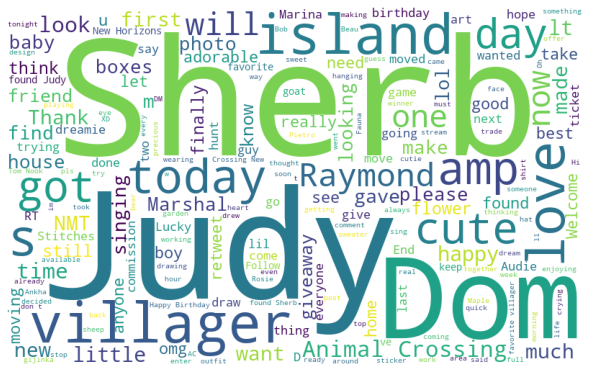

In [215]:
from wordcloud import WordCloud, STOPWORDS

temp=' '.join(dfvillager['tweet'].tolist())
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(temp)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()